In [14]:
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp

In [21]:
file_name = "random_output_hash_drbg.txt"
with open(file_name, "r") as f:
    contents = f.read()
double_drbg = [int(contents[i:i+2], base=16) for i in range(0, len(contents)//2, 2)]


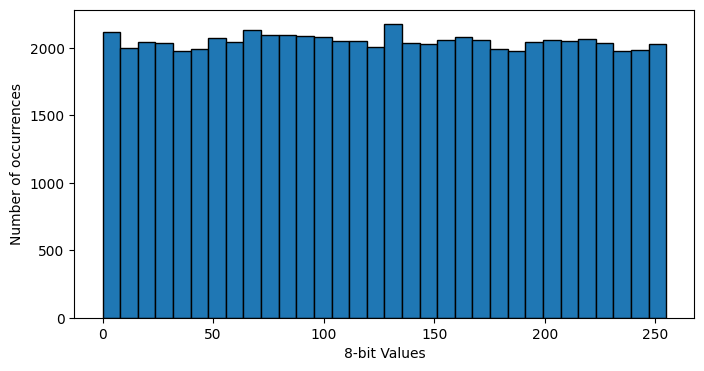

In [26]:
plt.figure(figsize=(8,4))
# plt.title("Distribution of numbers generated by Double Hash DRBG")
plt.ylabel("Number of occurrences")
plt.xlabel("8-bit Values")
plt.hist(double_drbg, bins=32, ec="k")
plt.savefig("hash_drbg.pdf")
plt.show()

# Frequency (Monobit) Test

In [23]:
binary_sequence = np.array(double_drbg).astype(np.uint8)
binary_sequence = [np.unpackbits(i) for i in binary_sequence]
binary_sequence = np.concatenate(binary_sequence).astype(np.int8)
binary_sequence = 2*binary_sequence - 1
s_observed = np.abs(np.sum(binary_sequence)) / np.sqrt(len(binary_sequence))
z = s_observed / np.sqrt(2)
# erfc
p_value = sp.special.erfc(z)
p_value

0.19707932188000155